# Degaussing program

Purpose:

    - Produce more reliable magnet saves for more consistent operation
    
    - Save labor-hours on finding low and high energy drift
    
    - More consistent operation for production of isotopes

Method:

    - Produce a Guassian Curve.
    
    - Assign the curve to a scaled magnet value
    
    - Run the program to degauss the magnets


### Imports

In [1]:
import Master as M
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import time

### Adjustable Key Parameters

In [2]:
Time = 5 #Artbitrary scaling, defualt value
Amplitude = 1
Decay_Constant = .6 #Lower values = more peaks, longer decay time
                #higher values = more decay between each peak, recommended range
                # of 0.4 < x < 0.75
Points = 1500

Dipole_Amplitude = 5 #(Amps) The value we want Dipoles to reach in the peak
                        #This can also be set to the start value if need be

WF_Amplitude = 3 #(Amps)

Sol_Amplitude = 5 #(Amps)

### PLC Parameters

In [3]:
Client = M.Make_Client("192.168.1.2")

Dipole_Start_Tag = 22201 #First Dipole we are controlling

Window_Frame_Start_Tag = 20201 #First Window Frame we are controlling

Solenoid_Start_Tag = 21201 #First Solenoid we are controlling

Dipole_Count = 8 #Number of Dipoles 

Window_Frame_Count = 21 #Number of Window Frames

Solenoid_Count = 9 #Number of Solenoids (Not used currently)

### Producing the Gaussian

#### Use the following equation to produce the Gaussian

$$y(t) = A \cdot e^{- \omega t} \cdot cos(\frac{1}{\omega} \cdot 2 \pi t)$$



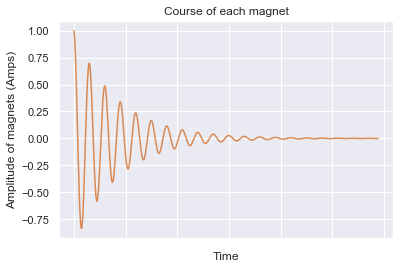

In [4]:
x = np.linspace(0,Time*3/4*np.pi, Points) #Defining the number of points that we'll take

y = (Amplitude) * np.exp(Decay_Constant * -x) * np.cos(1/Decay_Constant * (2 * np.pi * x)) #Producing the Guassian

y[-1] = 0 #Setting the last point in y to 0 so all magnets are at 0

plt.plot(x,y,color = 'chocolate', alpha = 0.75)
plt.title("Course of each magnet")
plt.ylabel("Amplitude of magnets (Amps)")
plt.xlabel("Time")
plt.gca().axes.xaxis.set_ticklabels([]); #Turn the xlables of since they are arbitrary

### Writing to the PLC's

In [ ]:
for pre_scaled_value in y:
    
    Dipoles = [] #Creating Dipole list (and emptying every loop)
    WFs = [] #Creating and emptying the list of WF values for the next write
    Sols = [] #Creating the list and the functionality just not using for now
    
    #Creating the correct sized list to input into the write_multiple function
    for _ in range(Dipole_Count):
        Dipoles.append(pre_scaled_value * Dipole_Amplitude)
        
    for _ in range(Window_Frame_Count * 2): #Multiplied by two because we have 
                                            #Horizontal and Vertical
        WFs.append(pre_scaled_value * WF_Amplitude)
    
    for _ in range(Solenoid_Count):
        Sols.append(pre_scaled_value * Sol_Amplitude)
    
    M.Write_Multiple(Client, Dipole_Start_Tag, Dipoles)
    M.Write_Multiple(Client, Window_Frame_Start_Tag, WFs)
    
    ##################################################
    #DO NOT UNCOMMENT UNTIL WE HAVE SOLENOID TOGGLING FUNCTIONALITY
    #M.Write_Multiple(Client, Solenoid_Start_Tag, Sols)
    ##################################################